# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started! 

Import the file `'turnstile_180901.txt'`. 

In [157]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [159]:
# Rename all the columns to lower case
df.columns = [col.lower()for col in df.columns]
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Change the index to `'linename'`: 

In [160]:
# Change the index to 'linename'
df=df.set_index('linename')
df

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384
...,...,...,...,...,...,...,...,...,...,...
R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,05:00:00,REGULAR,5554,348
R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,09:00:00,REGULAR,5554,348
R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,13:00:00,REGULAR,5554,348


Reset the index: 

In [161]:
# Reset the index
df=df.reset_index()

Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [162]:
# Add a new 'num_lines' column
df['num_lines']=df['linename'].str.len()
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               ',
       'num_lines'],
      dtype='object')

Write a function to clean column names: 

In [163]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = col_name.strip()
    return cleaned

In [164]:
# Use the above function to clean the column names
df.columns = [clean(col) for col in df.columns]

In [165]:
# Check to ensure the column names were cleaned
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

In [166]:
pd.to_datetime(df['date'])

0        2018-08-25
1        2018-08-25
2        2018-08-25
3        2018-08-25
4        2018-08-25
            ...    
197620   2018-08-31
197621   2018-08-31
197622   2018-08-31
197623   2018-08-31
197624   2018-08-31
Name: date, Length: 197625, dtype: datetime64[ns]

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [167]:
# Convert the data type of the 'date' column to a date
df['date']= pd.to_datetime(df['date'])

# Add a new column 'day_of_week' that represents the day of the week 
df['day_of_week'] = df['date'].dt.day_name()

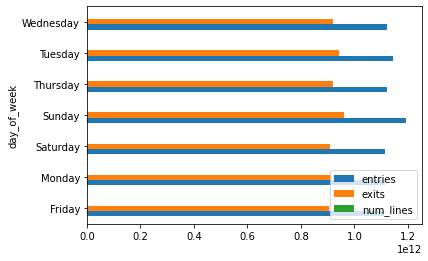

In [168]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum()
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [173]:
# Reset the index of grouped
grouped = grouped.reset_index()

# Print the first five rows of grouped
grouped.iloc[0:5]

,level_0,index,day_of_week,entries,exits,num_lines,is_weekend
0,0,0,Friday,1110224700078,906799065337,75573,NaN
1,1,1,Monday,1114237052454,911938153513,76110,NaN
2,2,2,Saturday,1115661545514,909142081474,74725,NaN
3,3,3,Sunday,1192306179082,959223750461,75306,NaN
4,4,4,Thursday,1122723988662,920691927110,76607,NaN


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [180]:
# Use this dictionary to create a new column 
weekend_map = {"Monday":False, "Tuesday":False, "Wednesday":False, "Thursday":False, "Friday":False, "Saturday":True, "Sunday":True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)
grouped

,level_0,index,day_of_week,entries,exits,num_lines,is_weekend
0,0,0,Friday,1110224700078,906799065337,75573,False
1,1,1,Monday,1114237052454,911938153513,76110,False
2,2,2,Saturday,1115661545514,909142081474,74725,True
3,3,3,Sunday,1192306179082,959223750461,75306,True
4,4,4,Thursday,1122723988662,920691927110,76607,False
5,5,5,Tuesday,1143313287046,942230721477,77303,False
6,6,6,Wednesday,1123655222441,920630864687,75713,False


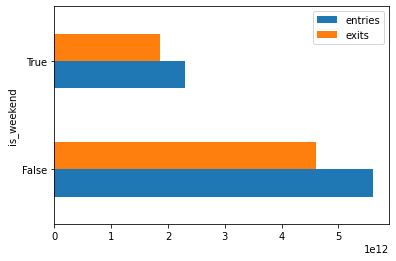

In [181]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').sum()
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

Remove the `'c/a'` and `'scp'` columns. 

In [185]:
# Remove the 'c/a' and 'scp' columns
df = df.drop(['c/a','scp'], axis=1)
df.head(2)

,linename,unit,station,division,date,time,desc,entries,exits,num_lines,day_of_week
0,NQR456W,R051,59 ST,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,Saturday
1,NQR456W,R051,59 ST,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,Saturday


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 
The raw data for entries/exits is cumulative. 

## Summary

Great! You practiced your data cleanup skills using Pandas.